In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

In [184]:
data = pd.read_csv("C:/Users/juana/test/csvFake.csv");
data.head();

### Diccionario de datos ;)

| Variable            | Descripcion                                                   | Es utilizada | Entrada/Salida |
|---------------------|---------------------------------------------------------------|--------------|----------------|
| job_id              | Id único del anuncio.                                         | NO           | -              |
| title               | Título del anuncio                                            | NO           | -              |
| location            | Ubicación geografica del anuncio                              | SI           | Entrada        |
| department          | Departamento de la empresa                                    | NO           | -              |
| salary_range        | Rango de salario ofrecido del anuncio                         | NO           | -              |
| company_profile     | Descripcion de la empresa                                     | SI           | Entrada        |
| description         | Descripción detallada del anuncio                             | SI           | Entrada        |
| requirements        | Requisitos necesarios                                         | SI           | Entrada        |
| benefits            | Beneficios ofrecidos por el empleador                         | SI           | Entrada        |
| telecommuting       | Posibilidad Homeoffice                 (0/1)                  | SI           | Entrada        |
| has_company_logo    | Anuncio contiene logo de la empresa    (0/1)                  | SI           | Entrada        |
| has_questions       | Se requiere evaluación previa          (0/1)                  | SI           | Entrada        |
| employment_type     | Tipo de empleo           (Full-Time / Part-Time / Contract)   | SI           | Entrada        |
| required_experience | Experiencia requerida                                         | SI           | Entrada        |
| required_education  | Nivel de educación requerida                                  | SI           | Entrada        |
| industry            | Tipo de rubro de la empresa                                   | NO           | -              |
| function            | Ámbito de trabajo                                             | NO           | -              |
| fraudulent          | Veracidad del anuncio                  (0/1)                  | SI           | Salida         |

### Notas sobre las variables:

- **departament: Área funcional de la empresa. Ejemplo: Ventas, compras, sistemas, etc. ** 
- **company_profile: Breve descripción de la empresa. ** 
- **industry: Rubro referido a la empresa en cuestión. Ejemplo: Informatica, bienes inmuebles, etc. **
- **function: Funcion a desarrollar dentro de la empresa. Ejemplo: Consultoria, Administración, Soporte, etc. ** 


### Variable de salida:

 - Nuestra variable de salida /target va a ser **fraudulent**.
 - Sus posibles valores de salida serán, 0 = Verdadero , 1 = Falso.

### Analisis de valores null

In [54]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [185]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

## Variables no utilizadas
- **salary_range:** De acuerdo a lo observado en el análisis anterior podemos decir que esta variable no será tenida en cuenta, debido a la cantidad de valores nulos que contiene.
- **job_id:** Se trata de una variable que se utiliza para enumerar cada uno de los artículos, consideramos que no brinda información útil para realizar la predicción.
- **department:** En este caso, no lo tendremos en cuenta debido a la gran variedad de departamentos que pueden existir. No consideramos que brinde información útil con respecto al problema.
- **title:** De acuerdo a lo observado, hay una gran variedad de titulos en relación a la cantidad de registros. Consideramos que no tenemos los conocimientos necesarios para procesar dicha variable, a diferencia de la variable description la cual vamos a realizar el conteo de palabras. 
- **industry:** Decidimos no tener en cuenta esta variable debido a la gran cantidad de variedad que podría existir. 
- **function:** Consideramos que esta variable no debe ser tenida en cuenta por el mismo motivo que la variable industria y título, ya que pueden existir una gran cantidad de valores en relación a los registros.  




In [20]:
prueba = data
datos = prueba.drop(['job_id', 'title', 'department', 'industry', 'function','salary_range'], axis=1)

datos

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,0
17876,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17877,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,0
17878,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0


### Variables de entrada

In [227]:
localidades = []

for variable in data.location:
    if variable not in localidades:
        prueba.append(localidades)

result=[]
for var in localidades:
    loc = data[data.location == var]
    loc_fake = loc[loc.fraudulent ==1]   
    result.append((var,loc_fake.fraudulent.count()))
    
sorted_ = sorted(prueba1, key=lambda tup: tup[1])
sorted_invertido = sorted_by_second[::-1]
sorted_invertido

#Consideramos que la variable de entrada location es importante tenerla en cuenta a la hora de realizar predicciones ya que 
#como podemos observar en los resultados que se muestran debajo demostramos que existe una tendencia a que los anuncios 
#fraudulentos provengan de ciertas localidades.

[('US, TX, Houston', 92),
 ('AU, NSW, Sydney', 31),
 ('US, , ', 28),
 ('US, CA, Bakersfield', 24),
 ('US, CA, Los Angeles', 23),
 ('US, CA, San Mateo', 22),
 ('US, NY, New York', 20),
 ('US, TX, AUSTIN', 14),
 ('US, CA, San Jose', 14),
 ('US, TX, DALLAS', 12),
 ('US, MD, Baltimore', 11),
 ('US, CA, San Francisco', 11),
 ('US, CA, ', 9),
 ('US, NY, NY', 8),
 ('US, OH, Cincinnati', 8),
 ('MY, , ', 7),
 ('US, TX, Austin', 7),
 ('US, CA, LOS ANGELES', 6),
 ('US, WA, Seattle', 6),
 ('CA, ON, Toronto', 6),
 ('US, NV, ', 5),
 ('US, KY, ', 5),
 ('US, FL, MIAMI', 5),
 ('US, GA, ', 5),
 ('US, GA, Atlanta', 5),
 ('US, PA, Philadelphia', 5),
 ('US', 5),
 ('US, IL, CHICAGO', 4),
 ('US, CA, Bakersfield, CA', 4),
 ('US, DC, ', 4),
 ('AU, , ', 4),
 ('US, NY, ', 4),
 ('US, NE, Omaha', 4),
 ('US, IL, Chicago', 4),
 ('US, GA, ATLANTA', 3),
 ('US, WA, ', 3),
 ('US, CT, ', 3),
 ('QA, DA, ', 3),
 ('US, WA, Bellevue', 3),
 ('PL, MZ, Warsaw', 3),
 ('US, IL, chicago', 3),
 ('US, TX, Deweyville', 3),
 ('US, KY,

#### En las siguientes columnas reemplazamos los valores 'NaN' por 'Sin datos'

In [15]:
categorias_columnas = ['employment_type', 'required_experience', 'required_education']
for col in categorias_columnas:
    datos[col].fillna("Sin datos", inplace=True)

#### En las siguientes columnas reemplazamos los valores 'NaN' por '  '

In [17]:
txt_columnas = ['company_profile', 'description', 'requirements', 'benefits']

datos = datos.dropna(subset=txt_columnas, how='all')

for col in txt_columnas:
    datos[col].fillna('', inplace=True)

### Balanceo 

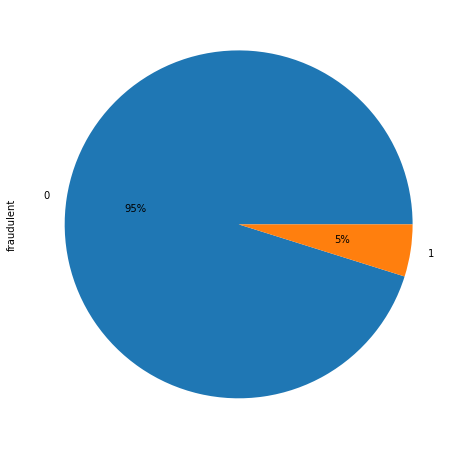

In [18]:
data.fraudulent.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

En cuanto al balanceo de la información respecto al caso de estudio, se puede observar en el gráfico anterior, los datos pertenecientes a nuestra variable target están bastantes desbalanceados. Sin embargo, consideramos que esto corresponde al caso de estudio en cuestión, es decir, refleja la realidad. Por ende, no descartaremos el dataset.

### Graficación, explicación, comportamiento de las variables de entrada y cómo afectan a la variable de salida.

Las variables elegidas son :
    - telecommuting
    - has_company_logo
    - has_questions
    - required_experience
    - required_education


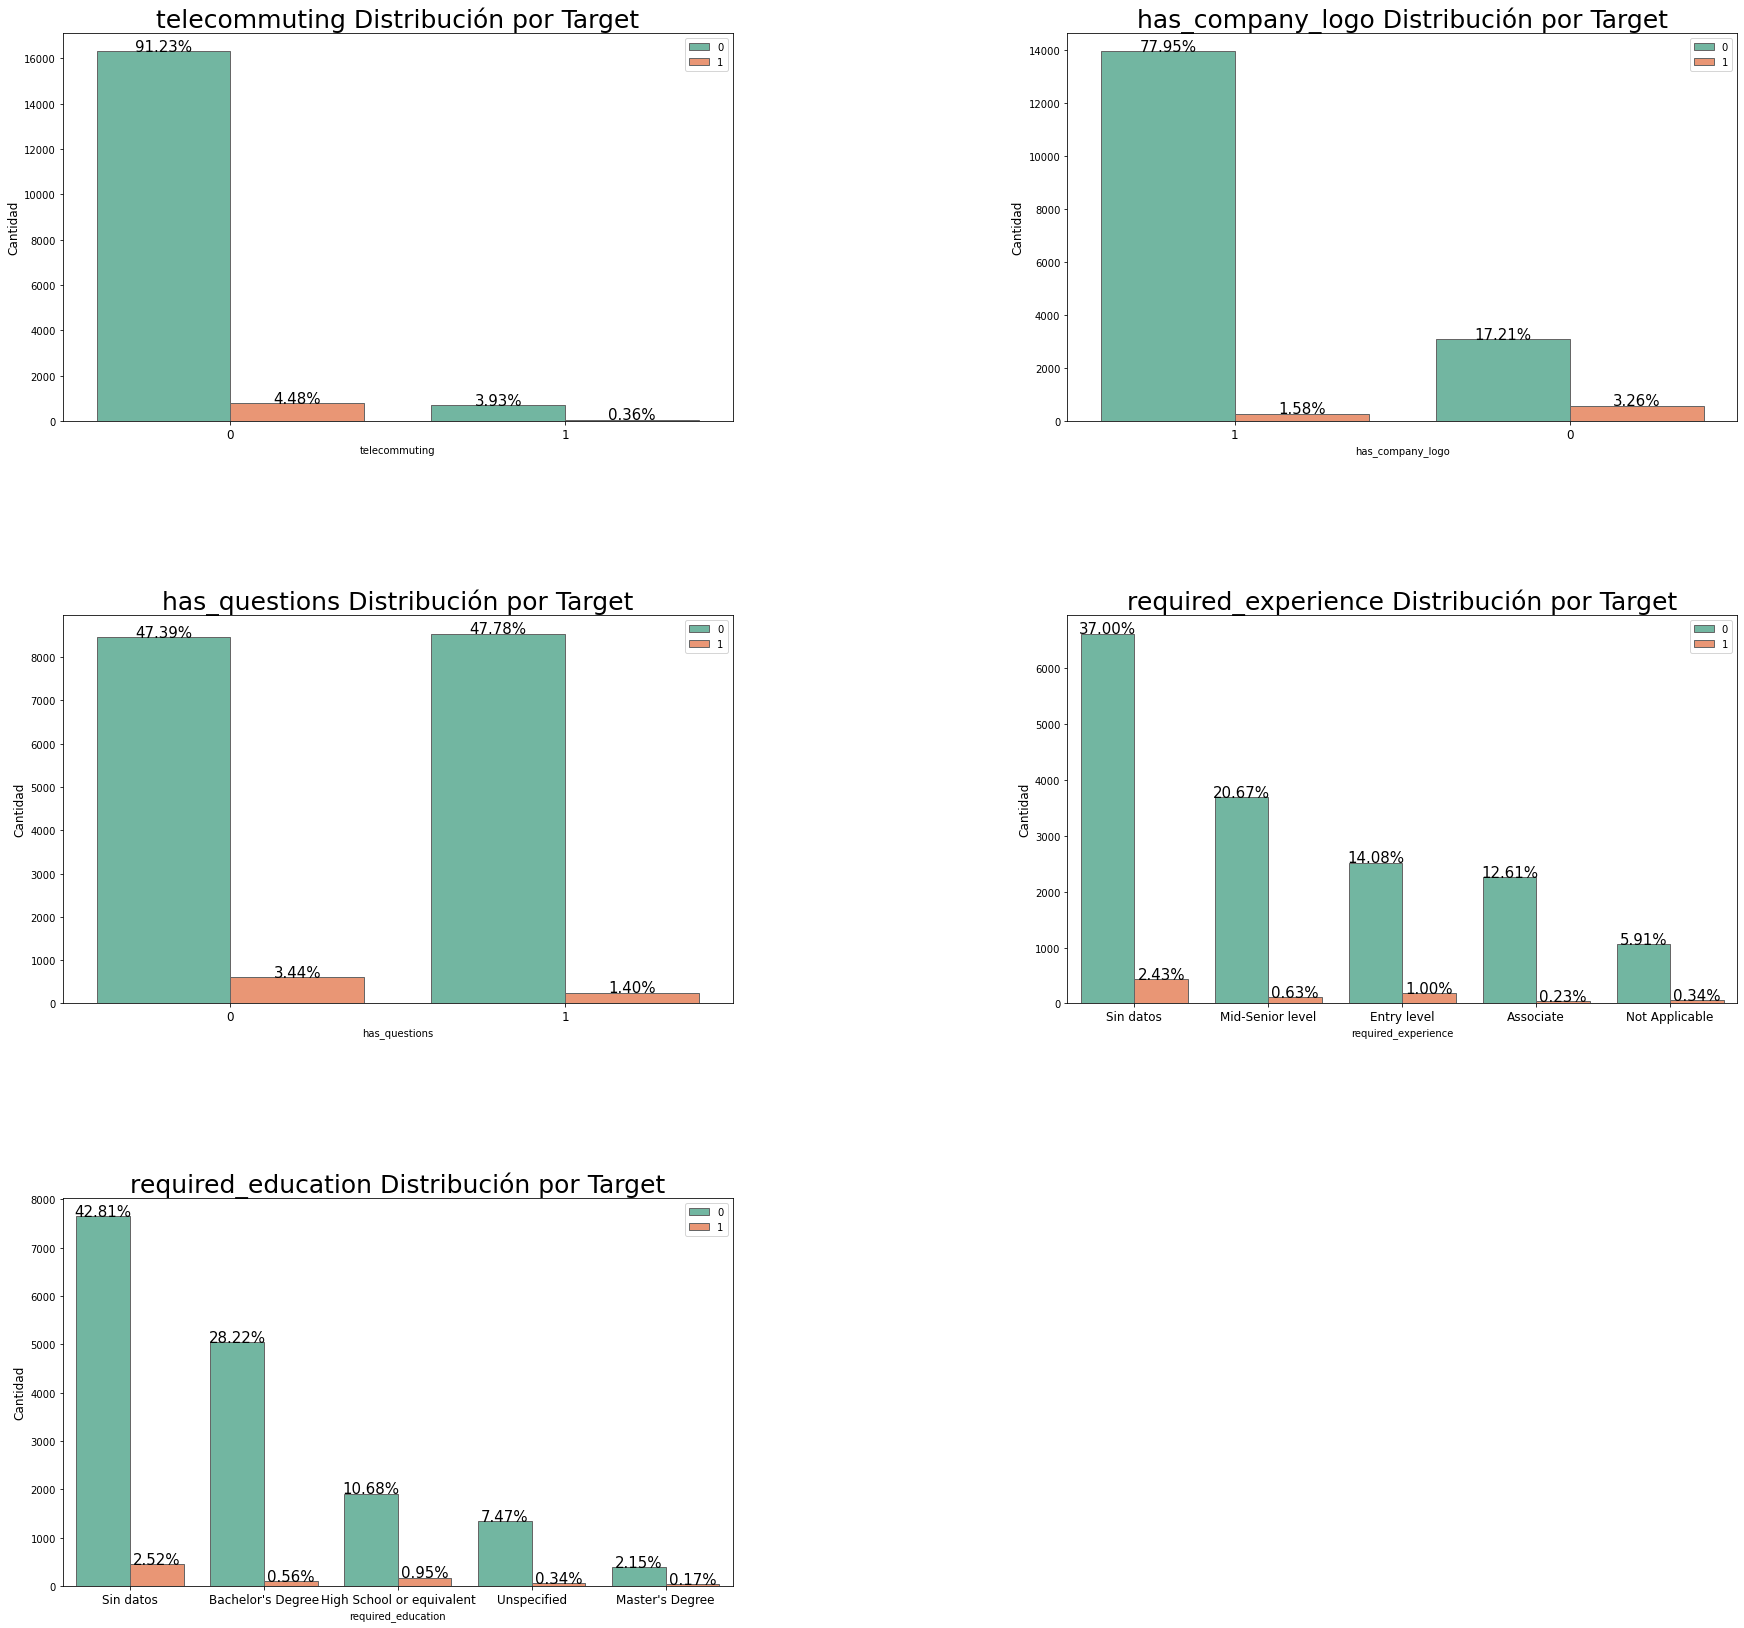

In [19]:
#Categorias
categorias_col = ['telecommuting', 'has_company_logo', 'has_questions', 'required_experience', 'required_education']

tabla = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(30,50)) #Tamaño de cada grafico

for n, col in enumerate(datos[categorias_col]):
    ax = plt.subplot(tabla[n]) 
    sns.countplot(x=col,edgecolor=".4", data=datos, hue='fraudulent', palette='Set2', order=datos[col].value_counts().iloc[:5].index)    
    ax.set_ylabel('Cantidad', fontsize=12) #Descripcion eje y
    
    ax.set_title(f'{col} Distribución por Target', fontsize=25) #Titulo de cada gráfico
    xlabels = ax.get_xticklabels() #Descripcion de cada columna
    ax.set_xticklabels(xlabels,fontsize=12 )
    plt.legend(fontsize=10) 
    ax.set_facecolor('white') #Color de fondo de los graficos
    cantidad_total = len(datos)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/cantidad_total*100), 
                ha="center", fontsize=15) #%, con cant de decimales
  
plt.show()

#### Mediante el análisis realizado podemos determinar como se comportan dichas variables de entrada en realción al target

- **telecommuting:** Mediante el gráfico podemos observar que el 91,23% de los datos poseen la posibilidad de realizar homeoficce contra el restante de 3,93% que no lo permiten. Dentro de esa distribucion extraimos cuales eran falsas y cuales no, del las publicaciones que permitian homeoficce el 4,48% son falsas y de las que no permitian solo el 0,36%. Podemos afirmar que las publicaciones fraudulentas en su mayoría se publican con la posibilidad de hacer homeoficce.
- **has_company_logo:** En relación a esta variable de entrada obtuvimos que el 77,95% de los datos no presentan logo en sus publicaciones de las cuales solo el 1,58% de los mismas son falsas, mientras que el 17,21% lo hacen. Las publicaciones que no contienen logo el 3,26% son falsas. Por lo tanto, las publicaciones falsas en su mayoría contien el logo de la empresa.
- **has_questions:** Observamos que en esta variable la distribución de los datos es muy equilibrada, debido a que el 47,39% de las publicaciones requieren evaluación previa y el 47,78% no lo hace. En relación al porcentaje de anuncios falsos, vemos que el 3,44% de las que requieren evaluacion previa son falsas, mientras que el 1,40% de las que no requieren evaluacion son verdaderas. Podemos ver que con respecto a la cantidad de anuncios falsos que se encuentran en el dataset, aquellos que no requieren evaluacion previa representan el 33% de publicaciones falsas.  
- **required_experience:** Para la variable required_experience podemos ver que el 37,00% de las publicaciones no poseen datos y el 2,43% de las mismas son falsas. En cuanto a los demas valores disponibles para que esta variable puede obtener vemos que el 20,67% requiere ser mid-senior level, el 14,08% entry level , el 12,61% associate y el 5,91% not applicable. En estas últimas clasificaciones el porcentaje de anuncios falsos es 0,63% en mid-senior level, 1% en associate y 0,34% en not applicable. En conclusión gran cantidad de las publicaciones fraudulentas no presentan datos en la variable analizada. 
- **required_education:** La distribucion de esta variable es similar a la de required_experience, debido a que gran cantidad de registros no poseen datos (42,81%), y de este porcentaje el 2,52% son publicaciones falsas. Con respecto a los demas valores no superan el 1% de anuncios falsos en relación a su distribución. 